## Unit 7 | Assignment - Distinguishing Sentiments

Background

Twitter has become a wildly sprawling jungle of information—140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out per day. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose one of the following two assignments, in which you will do just that. Good luck!


News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: BBC, CBS, CNN, Fox, and New York times.



The first plot will be and/or feature the following:


Be a scatter plot of sentiments of the last 100 tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
Each plot point will reflect the compound sentiment of a tweet.
Sort each plot point by its relative timestamp.


The second plot will be a bar plot visualizing the overall sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, seaborn, textblob, and VADER.

Your final Jupyter notebook must:


Pull last 100 tweets from each outlet.
Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
Export the data in the DataFrame into a CSV file.
Save PNG images for each plot.


As final considerations:


Use the Matplotlib and Seaborn libraries.
Include a written description of three observable trends based on the data. 
Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
Include an exported markdown version of your Notebook called  README.md in your GitHub repository.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
from datetime import datetime
import time
import seaborn as sns
from twitter_config import *

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# Target User Accounts
target_user = ("@BBCNorthAmerica", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

In [4]:
# Variable for holding sentiments
sentiments =[]


# Loop through each users:
for user in target_user:
    
    # Counter
    counter = 1

    # Loop through 5 pages of tweets (total 100 tweets)
    for page in tweepy.Cursor(api.user_timeline, id=user).pages(5):
        
        # Get all tweets from home feed
        public_tweets = page
        
        # Loop through all tweets
        for tweet in public_tweets:
            
            text = tweet._json["text"]
            
            #Tweet datetime object
            time_stamp = tweet._json["created_at"]
            time_stamp = datetime.strptime(time_stamp, "%a %b %d %H:%M:%S %z %Y")
            
            #Get the Real Name of twitter target
            name = tweet._json['user']['name']
            
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(text)["compound"]
            pos = analyzer.polarity_scores(text)["pos"]
            neu = analyzer.polarity_scores(text)["neu"]
            neg = analyzer.polarity_scores(text)["neg"]
            
            # Add sentiments for each tweet into an array
            sentiments.append({"Media Sources": name,
                               "Date": time_stamp, 
                               "Tweet Text" : text,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
            # Add to counter 
            counter += 1

In [5]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd[:10]

Compound                      Date      Media Sources  Negative  Neutral  \
0   -0.3400 2018-03-24 03:52:04+00:00  BBC North America     0.769    0.231   
1    0.4019 2018-03-24 02:49:02+00:00  BBC North America     0.828    0.000   
2    0.3400 2018-03-24 02:09:29+00:00  BBC North America     0.714    0.000   
3    0.0000 2018-03-24 02:01:23+00:00  BBC North America     1.000    0.000   
4   -0.2263 2018-03-24 01:45:17+00:00  BBC North America     0.787    0.213   
5    0.0000 2018-03-24 00:50:03+00:00  BBC North America     1.000    0.000   
6   -0.3400 2018-03-23 23:35:22+00:00  BBC North America     0.745    0.255   
7    0.0000 2018-03-23 22:37:25+00:00  BBC North America     1.000    0.000   
8   -0.3818 2018-03-23 21:41:40+00:00  BBC North America     0.500    0.307   
9    0.3400 2018-03-23 21:10:09+00:00  BBC North America     0.789    0.000   

   Positive                                         Tweet Text  Tweets Ago  
0     0.000  The art of the US gun reform movement https://...           1  
1     0.172  Was the #Stoneman shooting any different? Yes,...           2  
2     0.286  The week Facebook's value plunged $58bn https:...           3  
3     0.000  Florida school shooting: Pennsylvania students...           4  
4     0.000  Illustrating this turbulent time in American p...           5  
5     0.000  "Why I'm marching on Washington DC" https://t....           6  
6     0.000  America's gun reform in 10 charts https://t.co...           7  
7     0.000  Elon Musk pulls Tesla and SpaceX from Facebook...           8  
8     0.193  Iowa family found dead in Mexico holiday home ...           9  
9     0.211  John Bolton: Who is Trump's new national secur...          10

In [6]:
sentiments_pd = sentiments_pd[['Media Sources', 
                               'Tweet Text', 
                               'Date','Compound', 
                               'Positive', 
                               'Neutral', 
                               'Negative',
                               'Tweets Ago']]
sentiments_pd.to_csv("Resources/news_media_tweets.csv")
sentiments_pd[:10]

Media Sources                                         Tweet Text  \
0  BBC North America  The art of the US gun reform movement https://...   
1  BBC North America  Was the #Stoneman shooting any different? Yes,...   
2  BBC North America  The week Facebook's value plunged $58bn https:...   
3  BBC North America  Florida school shooting: Pennsylvania students...   
4  BBC North America  Illustrating this turbulent time in American p...   
5  BBC North America  "Why I'm marching on Washington DC" https://t....   
6  BBC North America  America's gun reform in 10 charts https://t.co...   
7  BBC North America  Elon Musk pulls Tesla and SpaceX from Facebook...   
8  BBC North America  Iowa family found dead in Mexico holiday home ...   
9  BBC North America  John Bolton: Who is Trump's new national secur...   

                       Date  Compound  Positive  Neutral  Negative  Tweets Ago  
0 2018-03-24 03:52:04+00:00   -0.3400     0.000    0.231     0.769           1  
1 2018-03-24 02:49:02+00:00    0.4019     0.172    0.000     0.828           2  
2 2018-03-24 02:09:29+00:00    0.3400     0.286    0.000     0.714           3  
3 2018-03-24 02:01:23+00:00    0.0000     0.000    0.000     1.000           4  
4 2018-03-24 01:45:17+00:00   -0.2263     0.000    0.213     0.787           5  
5 2018-03-24 00:50:03+00:00    0.0000     0.000    0.000     1.000           6  
6 2018-03-23 23:35:22+00:00   -0.3400     0.000    0.255     0.745           7  
7 2018-03-23 22:37:25+00:00    0.0000     0.000    0.000     1.000           8  
8 2018-03-23 21:41:40+00:00   -0.3818     0.193    0.307     0.500           9  
9 2018-03-23 21:10:09+00:00    0.3400     0.211    0.000     0.789          10

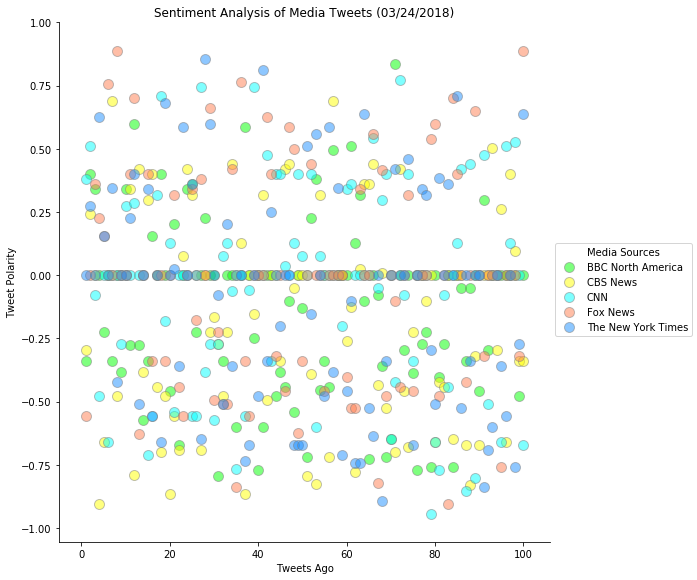

In [10]:
color_palette = ('lime', 'yellow', 'cyan', 'coral', 'dodgerblue')

g = sns.lmplot(x='Tweets Ago', 
           y='Compound', 
           data=sentiments_pd,
           fit_reg=False,
           size = 8,
           legend_out=True,
           hue='Media Sources',
           palette = color_palette,
           scatter_kws={"s":100,"alpha":0.5,"linewidth":1,"edgecolors":'grey'})

plt.title(f"Sentiment Analysis of Media Tweets ({time.strftime('%m/%d/%Y')})")
plt.ylabel('Tweet Polarity')
plt.savefig("Resources/Media_tweets_sentiment_analysis.png")
plt.show()

In [8]:
sentiments_summary = sentiments_pd.groupby('Media Sources', as_index=False).mean()
sentiments_summary = sentiments_summary[['Media Sources', 'Compound']]
sentiments_summary

Media Sources  Compound
0   BBC North America -0.128016
1            CBS News -0.156817
2                 CNN -0.041507
3            Fox News -0.009321
4  The New York Times -0.081286

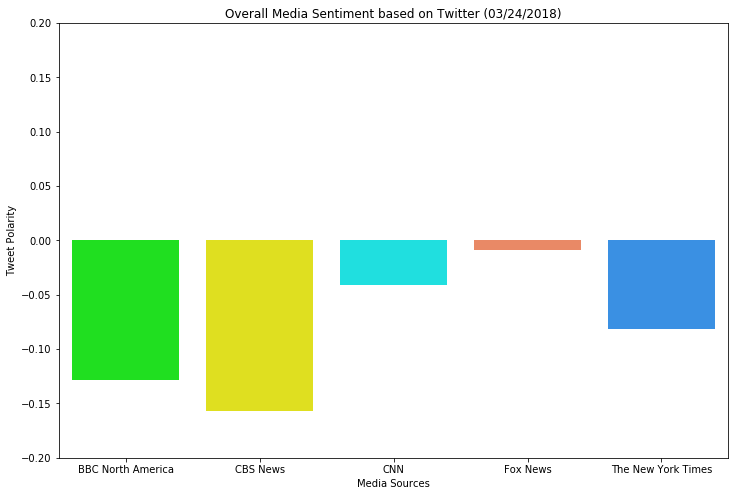

In [12]:
plt.figure(figsize=(12,8))
plt.ylim(-0.2,0.2)
ax = sns.barplot(x = sentiments_summary['Media Sources'], 
                 y = sentiments_summary['Compound'],
                 data=sentiments_summary,
                 palette = color_palette
                )

plt.title(f"Overall Media Sentiment based on Twitter ({time.strftime('%m/%d/%Y')})")
plt.ylabel('Tweet Polarity')
plt.savefig("Resources/Overall_Media_Sentiment.png")
plt.show()